In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("StudentHoursScores.csv")

In [3]:
df.head()

,Hours,Scores
0,7.7,79
1,5.9,60
2,4.5,45
3,3.3,33
4,1.1,12


In [4]:
df.tail()

,Hours,Scores
18,9.6,96
19,4.3,42
20,4.1,40
21,3.0,30
22,2.6,25


In [5]:
df.shape

(23, 2)

In [6]:
df.describe() # All Numerical Statistical Data

,Hours,Scores
count,23.000000,23.000000
mean,4.817391,47.695652
std,2.709688,27.103228
min,1.100000,12.000000
25%,2.650000,27.000000
50%,4.100000,40.000000
75%,7.100000,72.500000
max,9.600000,96.000000


In [7]:
df.nunique()

Hours     22
Scores    22
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   23 non-null     float64
 1   Scores  23 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

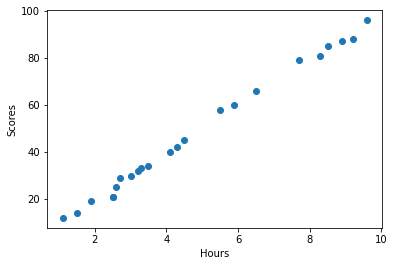

In [10]:
%matplotlib inline
plt.scatter(df["Hours"],df["Scores"])  # Mostly Linear Data
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.997656
Scores,0.997656,1.000000


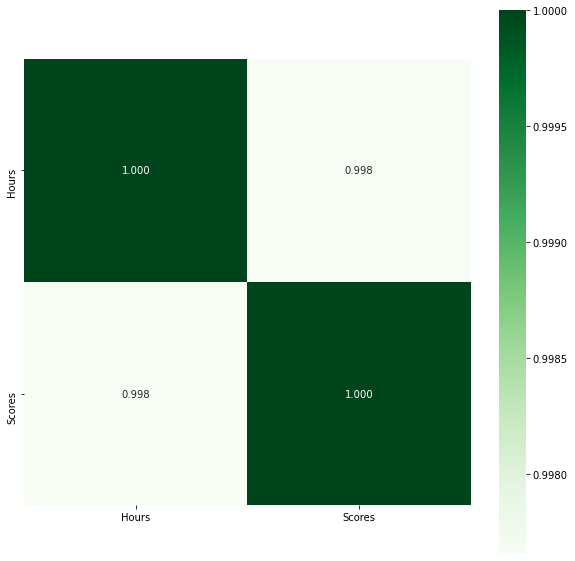

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot =True,fmt = ".3f",square = True,cmap = "Greens")
plt.show()

In [13]:
x = df.drop(["Scores"],axis = 1)
x.head()

,Hours
0,7.7
1,5.9
2,4.5
3,3.3
4,1.1


In [14]:
y = df["Scores"]
y.head()

0    79
1    60
2    45
3    33
4    12
Name: Scores, dtype: int64

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [16]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
y_predict = model.predict(x_test)
y_predict

array([31.59205411, 82.29863163, 76.33315192, 26.62082102, 24.63232779])

In [18]:
d = df[["Hours"]]
p = model.predict(d)
df["Predict"] = p     # Creating New column
df

,Hours,Scores,Predict
0,7.7,79,76.333152
1,5.9,60,58.436713
2,4.5,45,44.517260
3,3.3,33,32.586301
4,1.1,12,10.712875
5,8.9,87,88.264111
6,2.5,21,24.632328
7,1.9,19,18.666848
8,2.7,29,26.620821
9,8.3,81,82.298632


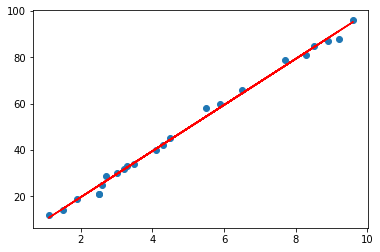

In [19]:
plt.scatter(df["Hours"],df["Scores"])
plt.plot(df["Hours"],model.predict(df[["Hours"]]),color = "red")
plt.show()

In [20]:
model.coef_

array([9.94246618])

In [21]:
model.intercept_

-0.22383766132793426

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Accuracy :", r2_score(y_test,y_predict))
print("Mean Squared Error :", mean_squared_error(y_test,y_predict))

Accuracy : 0.9918063029011629
Mean Squared Error : 5.563848077994367
